In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
1151,21,31,32,35.385987,51.426642,5.254532,90.296439,mango
1066,103,72,51,26.126434,81.813650,6.099479,104.481286,banana
379,5,65,16,21.327760,18.485229,5.866744,109.101326,kidneybeans
1054,95,75,45,28.983334,82.959582,5.829899,109.022564,banana
1814,19,15,34,26.296449,99.658092,5.685889,215.919505,coconut


In [5]:
df.size

17600

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df.corr(numeric_only=True)

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [10]:
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file = 'output.html')

<Axes: xlabel='P'>

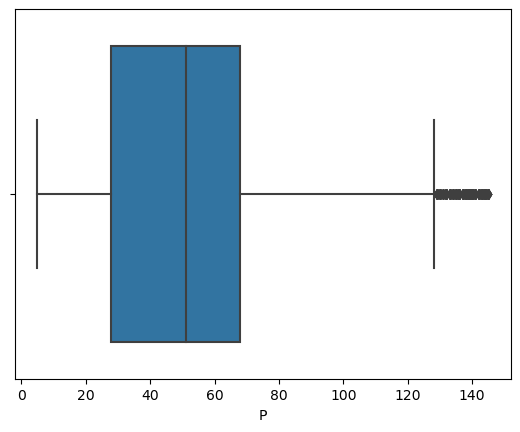

In [11]:
sns.boxplot(x = 'P', data = df.iloc[:,:300])

<Axes: xlabel='rainfall', ylabel='humidity'>

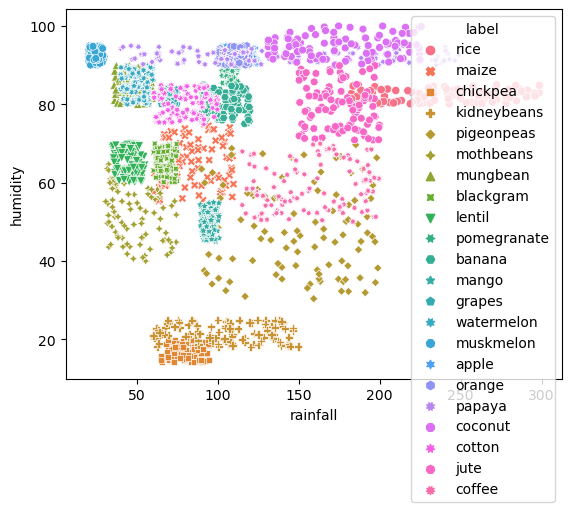

In [12]:
sns.scatterplot(x = 'rainfall', y= 'humidity', data=df,
               style='label',
               hue='label')

In [13]:
# sns.pairplot(df, hue = 'label')

In [14]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [15]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns='label'),
    df['label'],
    test_size=0.2
)

In [19]:
x_train.shape

(1760, 7)

In [20]:
x_test.sample(5)

,N,P,K,temperature,humidity,ph,rainfall
598,2,51,17,25.876823,45.963419,5.838509,38.532547
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1348,102,28,54,25.156231,80.275251,6.862157,55.495415
491,4,69,19,19.251001,47.703518,5.374359,149.063196
1415,95,27,55,28.472126,91.213221,6.160414,20.886204


In [21]:
y_train.sample(5)

316     kidneybeans
1970         cotton
501       mothbeans
927     pomegranate
1205         grapes
Name: label, dtype: object

<Axes: >

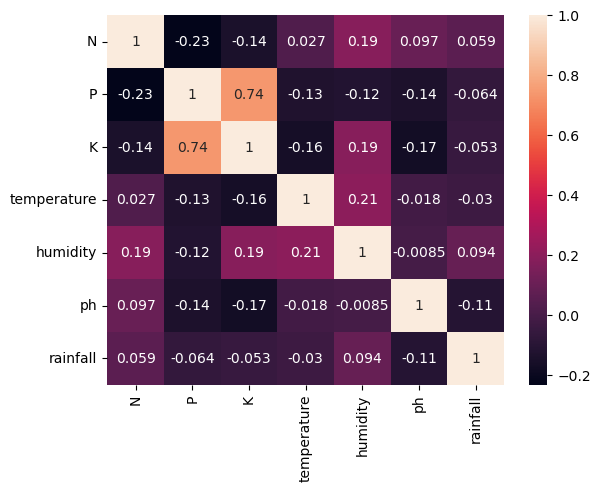

In [22]:
sns.heatmap(df.drop(columns=['label']).corr(), annot=True)

## column transformers

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [25]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [26]:
trf1 = ColumnTransformer(transformers=[
    ('standarisation', StandardScaler(with_mean=False), [0,6]),
],
    remainder='passthrough'
)

In [27]:
trf2 = ColumnTransformer(transformers=[
    ('ohe_label', OneHotEncoder(handle_unknown='ignore'), [-1])
], remainder='passthrough')

In [28]:
trf3 = DecisionTreeClassifier()

In [29]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
])

In [30]:
# # exporting the pipeline
# import pickle
# pickle.dump(pipe, open('models/crop.pkl', 'wb'))

# Using All Machine Learning Algorithms

In [32]:
# Import KNN, SVM, Decision Tree, Logistic Regression, Naive Bayes, Linear Regression, GBM, and Random Forest
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors (KNN)
from sklearn.svm import SVC  # Support Vector Machine (SVM)
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting Machine (GBM)
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [33]:
# Example model instantiations
knn_model = KNeighborsClassifier()
svm_model = SVC()
decision_tree_model = DecisionTreeClassifier()
logistic_regression_model = LogisticRegression()
naive_bayes_model = GaussianNB()
gbm_model = GradientBoostingClassifier()
random_forest_model = RandomForestClassifier()

In [34]:
models_dict = {
    'knn_model': knn_model,
    'svm_model': svm_model,
    'decision_tree_model': decision_tree_model,
    'logistic_regression_model': logistic_regression_model,
    'naive_bayes_model': naive_bayes_model,
    'gbm_model': gbm_model,
    'RandomForestClassifier': random_forest_model
}


In [35]:
models_dict.keys()

dict_keys(['knn_model', 'svm_model', 'decision_tree_model', 'logistic_regression_model', 'naive_bayes_model', 'gbm_model', 'RandomForestClassifier'])

In [36]:
pipelines = {
    'KNeighborsClassifier': Pipeline([
        ()  # StandardScaler as a preprocessing step
        ('classifier', KNeighborsClassifier())
    ]),
    'SVC': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ]),
    'DecisionTreeClassifier': Pipeline([
        # No need to scale for Decision Tree, so skipping the scaler
        ('classifier', DecisionTreeClassifier())
    ]),
    'LogisticRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'GaussianNB': Pipeline([
        # Naive Bayes does not require scaling, skipping the scaler
        ('classifier', GaussianNB())
    ]),
    'GradientBoostingClassifier': Pipeline([
        # Skipping scaler for GBM as it doesn't need feature scaling
        ('classifier', GradientBoostingClassifier())
    ]),
    'RandomForestClassifier': Pipeline([
        # Skipping scaler for Random Forest as it's not necessary
        ('classifier', RandomForestClassifier())
    ])
}

# Optionally, print the pipelines to check
for model_name, pipeline in pipelines.items():
    print(f"{model_name} pipeline:", pipeline)

KNeighborsClassifier pipeline: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])
SVC pipeline: Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])
DecisionTreeClassifier pipeline: Pipeline(steps=[('classifier', DecisionTreeClassifier())])
LogisticRegression pipeline: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])
GaussianNB pipeline: Pipeline(steps=[('classifier', GaussianNB())])
GradientBoostingClassifier pipeline: Pipeline(steps=[('classifier', GradientBoostingClassifier())])
RandomForestClassifier pipeline: Pipeline(steps=[('classifier', RandomForestClassifier())])


In [37]:
for name, model in models_dict.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} mode with accuracy: {score}")

knn_model mode with accuracy: 0.9795454545454545
svm_model mode with accuracy: 0.9727272727272728
decision_tree_model mode with accuracy: 0.990909090909091


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic_regression_model mode with accuracy: 0.9522727272727273
naive_bayes_model mode with accuracy: 0.9954545454545455
gbm_model mode with accuracy: 0.990909090909091
RandomForestClassifier mode with accuracy: 0.9954545454545455


In [38]:
for model_name, model in models_dict.items():
    pipelines[model_name] = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    (model_name,model),
])     

In [39]:
for name, model in models_dict.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} mode with accuracy: {score}")

knn_model mode with accuracy: 0.9795454545454545
svm_model mode with accuracy: 0.9727272727272728
decision_tree_model mode with accuracy: 0.990909090909091


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic_regression_model mode with accuracy: 0.9522727272727273
naive_bayes_model mode with accuracy: 0.9954545454545455
gbm_model mode with accuracy: 0.990909090909091
RandomForestClassifier mode with accuracy: 0.9954545454545455


In [40]:
import pickle
for model_name, pipeline in pipelines.items():
    print(f'"{model_name}" : "models/{model_name}.pkl",')
    file = pickle.dump(pipe, open(f'models/{model_name}.pkl', 'wb'))


"KNeighborsClassifier" : "models/KNeighborsClassifier.pkl",
"SVC" : "models/SVC.pkl",
"DecisionTreeClassifier" : "models/DecisionTreeClassifier.pkl",
"LogisticRegression" : "models/LogisticRegression.pkl",
"GaussianNB" : "models/GaussianNB.pkl",
"GradientBoostingClassifier" : "models/GradientBoostingClassifier.pkl",
"RandomForestClassifier" : "models/RandomForestClassifier.pkl",
"knn_model" : "models/knn_model.pkl",
"svm_model" : "models/svm_model.pkl",
"decision_tree_model" : "models/decision_tree_model.pkl",
"logistic_regression_model" : "models/logistic_regression_model.pkl",
"naive_bayes_model" : "models/naive_bayes_model.pkl",
"gbm_model" : "models/gbm_model.pkl",
